# **Diagnosing Acute Lymphoblastic Leukemia Using Vision Transformers**
(Capstone Project- Fall Sem 2024)

We have worked on developing an automated system for diagnosing acute lymphoblastic leukemia (ALL) using images of Peripheral Blood Smear (PBS):

### **Purpose of the Model:**
Our goal is to classify PBS images into Benign (non-cancerous) or one of the three malignant subtypes of ALL:
- Early Pre-B ALL
- Pre-B ALL
- Pro-B ALL

By achieving this, we aim to eliminate the need for invasive, expensive, and time-consuming diagnostic tests typically required for definitive ALL diagnosis. This offers several significant advantages:
- Faster initial screening
- Reduced dependency on highly skilled pathologists
- Improved diagnostic accuracy by reducing human error

Our work is driven by the aspiration to make ALL diagnosis more efficient and accessible, ultimately improving patient outcomes and streamlining the diagnostic process.

**Contributed by**,
* Lakshmipathi Rao Kocherlakota 21BCE8552
* Mahatir Ahmed Tusher 21BCE8971
* Sree Nikhil Velicheti 21BCE7775
* Saket Choudary Kongara  21BCE7918



### Mounting the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


dataSet = '/content/drive/MyDrive/MLProject/Original'

In [ ]:
torch.save(model.state_dict(), basePath)

In [ ]:


from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
dataSet = '/content/drive/MyDrive/MLProject/Original'

In [ ]:
import torch
import torchvision
from torch import nn
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch
import time
import torch
import numpy
from torch import nn
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data import SubsetRandomSampler
from torch.utils.data import random_split
import torch
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
import random
import zipfile
from pathlib import Path
import requests

In [ ]:
def computeAccu(model,dataLoader,device):
  model.eval()
  with torch.no_grad():
    correctPred = 0
    totalPred = 0

    for features,targets in dataLoader:
      features = features.to(device)
      targets  = targets.to(device)

      logits   = model(features)
      _ , predLabel = torch.max(logits,1)
      totalPred += targets.size(0)
      correctPred += (predLabel == targets).sum()

  return correctPred.float()/totalPred * 100
def setAllSeeds(seed):
  os.environ['MY_GLOBAL_SEED'] = str(seed)
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed_all(seed)

In [ ]:
def getViT(seed,classNames,DEVICE):
  setAllSeeds(seed)
  vitWeights = torchvision.models.ViT_B_16_Weights.DEFAULT
  vitTransforms = vitWeights.transforms()
  vit = torchvision.models.vit_b_16(weights=vitWeights).to(DEVICE)
  for param in vit.parameters():
    param.requires_grad = False
  vit.heads = nn.Linear(in_features=768, out_features=classNames).to(DEVICE)
  return vit,vitTransforms

In [ ]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model, transformers = getViT(42,4, DEVICE)

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:06<00:00, 57.1MB/s]


In [ ]:
trainDir = '/kaggle/working/output/train/'
testDir  = '/kaggle/working/output/test/'
valDir   = '/kaggle/working/output/val'
batchSize = 32
randomSeed = 42
numEpochs = 20

In [ ]:

mean = [0.5, 0.5, 0.5]
std = [0.5, 0.5, 0.5]

train_transforms = transforms.Compose([
                                       transforms.Resize((224,224)),
                                      # transforms.RandomHorizontalFlip(),
                                       transforms.RandomRotation(10),
                                       transforms.Resize((224,224)),
                                       transforms.ToTensor(),
                                       transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))])

In [ ]:
dataset_path = '/content/drive/MyDrive/MLProject/Original'

In [ ]:
data_set = torchvision.datasets.ImageFolder(root= dataset_path, transform= train_transforms)

In [ ]:

valid_size= 0.2 # taking 20% data as out validation set
num_train = len(data_set)
indices = list(range(num_train))
print('Total number of our train data: ',len(indices))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
#print(split)
train_idx, valid_idx = indices[split:], indices[:split]
print('After splitting train data: ',len(train_idx))
print('After splitting validation data: ',len(valid_idx))

Total number of our train data:  3256
After splitting train data:  2605
After splitting validation data:  651


In [ ]:
num_workers = 0
batch_size = 32

# obtain training indices that will be used for validation
valid_size= 0.2 # taking 20% data as out validation set
num_train = len(data_set)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

print('After splitting train data: ',len(train_idx))
print('After splitting validation data: ',len(valid_idx))

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(data_set, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(data_set, batch_size=batch_size,
    sampler=valid_sampler, num_workers=num_workers)
# image classes
classes = ['benign', 'early', 'pre', 'pro']


After splitting train data:  2605
After splitting validation data:  651


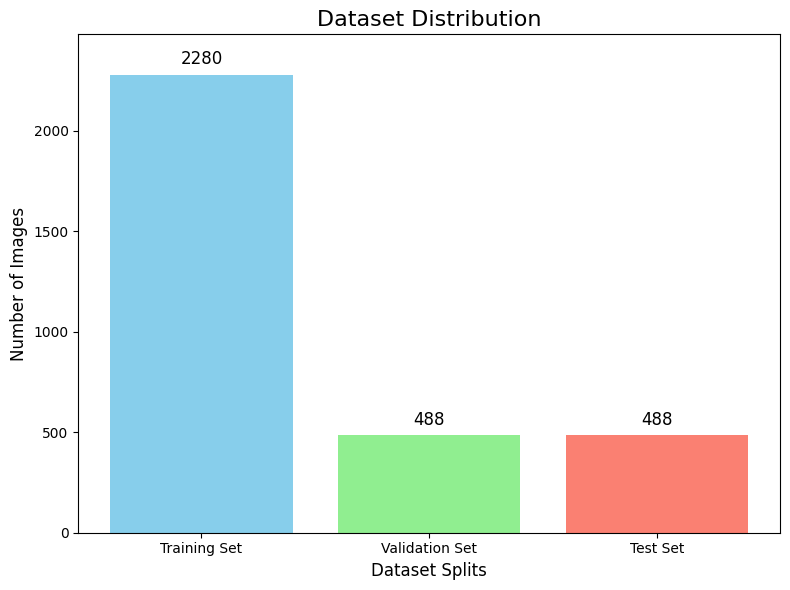

In [ ]:
import matplotlib.pyplot as plt

# Counts of images in each set (example values)
dataset_split_counts = {
    'Training Set': 2280,   # 70% of 3256
    'Validation Set': 488,  # 15% of 3256
    'Test Set': 488         # 15% of 3256
}

# Extract keys (set names) and values (image counts)
sets = list(dataset_split_counts.keys())
counts = list(dataset_split_counts.values())

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(sets, counts, color=['skyblue', 'lightgreen', 'salmon'])

# Add titles and labels
plt.title('Dataset Distribution', fontsize=16)
plt.xlabel('Dataset Splits', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.ylim(0, max(counts) + 200)  # Add some space above the tallest bar

# Add value annotations on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count + 50, str(count), ha='center', fontsize=12)

# Show the chart
plt.tight_layout()
plt.show()


In [ ]:
for images, labels in train_loader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

Image batch dimensions: torch.Size([32, 3, 224, 224])
Image label dimensions: torch.Size([32])
Class labels of 10 examples: tensor([1, 2, 3, 3, 2, 1, 2, 3, 0, 1])


In [ ]:
def modelTrainer(model1, numEpochs, trainLoader,testLoader,valLoader, opt, device,scheduler=None,schedulerOn='validAcc'):
  startTime = time.time()
  miniBatchLoss = []
  trainAccLoss = []
  valAccLoss = []
  valPlotAccLoss =[]
  for e in range(numEpochs):
    model1.train()
    for batchIdx, (features,targets) in enumerate(trainLoader):
      features = features.to(device)
      targets  = targets.to(device)

      logits = model1(features)
      # _, predLabel = torch.max(logits,1)

      cost = torch.nn.functional.cross_entropy(logits,targets)
      opt.zero_grad()
      cost.backward()
      opt.step()
      miniBatchLoss.append(cost.item())
      if ( not (batchIdx%50) ):
        print('Epoch:%03d/%03d | Batch:%03d/%03d |  Cost:%.4f' %(e+1, numEpochs, batchIdx, len(trainLoader), cost.item()))
    with torch.no_grad():
      print('Epoch:%03d/%03d |' %(e+1, numEpochs))
      trainLoss = computeAccu(model1, trainLoader,device)
      valLoss   = computeAccu(model1, valLoader  ,device)
      valAccLoss.append(valLoss)
      trainAccLoss.append(trainLoss.cpu().numpy())

      print(f'Train Acc {trainLoss :.4f}%')
      print(f'Val Acc   {valLoss:.4f}%')
      print(f'Time Taken: {((time.time()-startTime)/60):.2f} min')
      if(scheduler is not None):
        if(schedulerOn == 'validAcc'):
          scheduler.step(valAccLoss[-1])
        elif(schedulerOn == 'miniBatchLoss'):
          scheduler.step(miniBatchLoss[-1])
        else:
          raise ValueError(f'invalid choice for SchedulerOn {schedulerOn}')
      # valAccLoss[-1] = valLoss.detach().numpy()
      valPlotAccLoss.append(valLoss.cpu().numpy())
#     break
    if(not((e+1)%3)):
        torch.save(model1.state_dict(), f'model{e+1}.pt')
        torch.save(opt.state_dict(), f'optimizer{e+1}.pt')
        torch.save(scheduler.state_dict(), f'schd{e+1}.pt')
  testLoss = computeAccu(model1, testLoader, device)
  print(f'Test Acc   {testLoss:.4f}%')
  print(f'Total Time Taken: {((time.time()-startTime)/60):.2f} min')

  return miniBatchLoss, trainAccLoss, valPlotAccLoss

In [ ]:
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), momentum=0.9,lr=0.1)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [ ]:
setAllSeeds(42)
miniBatchLossList, trainAccList, validAccList = modelTrainer(
    model1=model,
    numEpochs=numEpochs,
    trainLoader=train_loader,
    valLoader=valid_loader,
    testLoader=valid_loader,
    opt=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    schedulerOn='validAcc')

Epoch:001/020 | Batch:000/082 |  Cost:1.4267
Epoch:001/020 | Batch:050/082 |  Cost:0.3533
Epoch:001/020 |
Train Acc 97.3512%
Val Acc   97.6959%
Time Taken: 28.61 min
Epoch:002/020 | Batch:000/082 |  Cost:0.0253
Epoch:002/020 | Batch:050/082 |  Cost:0.1409
Epoch:002/020 |
Train Acc 98.0806%
Val Acc   97.5422%
Time Taken: 29.95 min
Epoch:003/020 | Batch:000/082 |  Cost:0.1204
Epoch:003/020 | Batch:050/082 |  Cost:0.1093
Epoch:003/020 |
Train Acc 98.1574%
Val Acc   98.6175%
Time Taken: 31.29 min
Epoch:004/020 | Batch:000/082 |  Cost:0.1377
Epoch:004/020 | Batch:050/082 |  Cost:0.0024
Epoch:004/020 |
Train Acc 98.7332%
Val Acc   98.3103%
Time Taken: 32.64 min
Epoch:005/020 | Batch:000/082 |  Cost:0.0029
Epoch:005/020 | Batch:050/082 |  Cost:0.0000
Epoch:005/020 |
Train Acc 99.0787%
Val Acc   99.0783%
Time Taken: 33.97 min
Epoch:006/020 | Batch:000/082 |  Cost:0.0044
Epoch:006/020 | Batch:050/082 |  Cost:0.0000
Epoch:006/020 |
Train Acc 99.0403%
Val Acc   99.3856%
Time Taken: 35.30 min
Epoc

In [ ]:
def plotTrainingLoss(miniBatchLoss,numEpoch,iterPerEpoch,resultsDir=None,avgIter = 100):
  plt.figure()
  ax1 = plt.subplot(1,1,1)
  ax1.plot(range(len(miniBatchLoss)), miniBatchLoss, label='Mini Batch Loss')
  if len(miniBatchLoss) > 1000:
    ax1.set_ylim([0,np.max(miniBatchLoss[1000:])*1.5])
  ax1.set_xlabel('Iterations')
  ax1.set_ylabel('Loss')
  ax1.plot(np.convolve(miniBatchLoss,np.ones(avgIter,)/avgIter,mode='valid'),label='Running Avg')
  ax1.legend()

  ax2 = ax1.twiny()
  newLabel = list(range(numEpoch+1))
  newPos = [e*iterPerEpoch for e in newLabel]
  # ax2.set_xticks(newpos[::10])
  # ax2.set_xticklabels(newlabel[::10])

  ax2.set_xticks(newPos[::10])
  ax2.set_xticklabels(newLabel[::10])
  ax2.spines['bottom'].set_position(('outward',45))
  ax2.set_xlabel("Epochs")
  ax2.set_xlim(ax1.get_xlim())

  plt.tight_layout()

  if(resultsDir is not None):
    imagePath = os.path.join(resultsDir, 'plotTrainingLoss.pdf')
    plt.savefig(imagePath)

def plotAccuracy(trainAccList, valAccList, resultsDir = None):
  numEpoch = len(trainAccList)
  plt.plot(np.arange(1,numEpoch+1),trainAccList,label='Training')
  plt.plot(np.arange(1,numEpoch+1),valAccList,label='Validation')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.tight_layout()


  if(resultsDir is not None):
    imagePath = os.path.join(resultsDir, 'plotAccTrainingValidation.pdf')
    plt.savefig(imagePath)

def show_examples(model, dataLoader):
  for batchIdx, (features, targets) in enumerate(dataLoader):
    with torch.no_grad():
      features = features.to(torch.device('cpu'))
      targets  = targets.to(torch.device('cpu'))
      logits = model(features)
      predictions = torch.argmax(logits,dim=1)
    break

  fig, axes = plt.subplots(nrows=3,ncols=5,sharex=True,sharey=True)
  nhwcImage = np.transpose(features,axes = (0,2,3,1))
  nhwImage  = np.squeeze(nhwcImage.numpy(), axis=3)

  for idx,ax in enumerate(axes.ravel()):
    ax.imshow(nhwImage[idx],cmap='binary')
    ax.title.set_text(f'P: {predictions[idx]} | T: {targets[idx]}')
    ax.axison = False

  plt.tight_layout()
  plt.show()


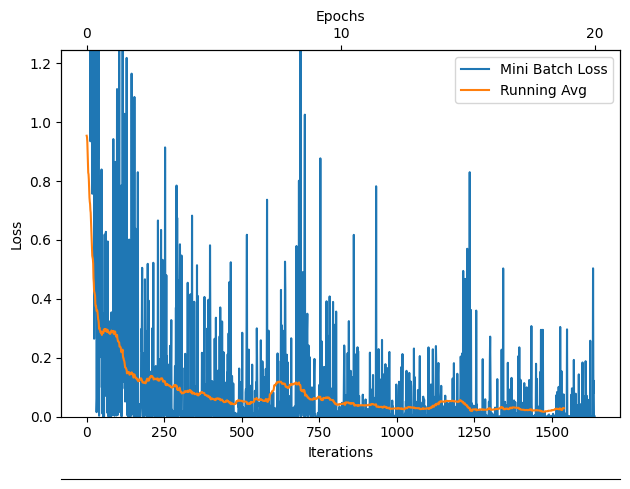

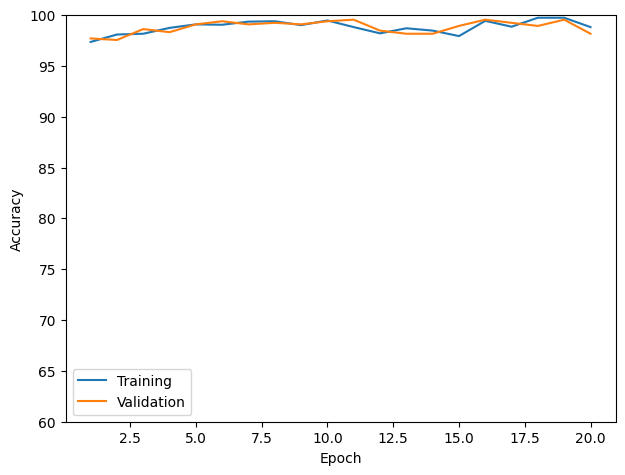

In [ ]:
plotTrainingLoss(miniBatchLoss=miniBatchLossList,
                   numEpoch=numEpochs,
                   iterPerEpoch=len(train_loader),
                   resultsDir=None,
                   avgIter=100)    #plotTrainingLoss(miniBatchLoss,numEpoch,iterPerEpoch,resultsDir=None,avgIter = 100)
plt.show()
plotAccuracy(trainAccList,validAccList)
plt.ylim([60,100])
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize placeholders for metrics
def validate_model(model, valid_loader, classes, device):
    model.eval()
    y_true = []
    y_pred = []
    y_probs = []

    with torch.no_grad():
        for images, labels in valid_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)  # Predicted probabilities
            probs = torch.softmax(outputs, dim=1)  # Convert logits to probabilities
            _, preds = torch.max(probs, 1)  # Predicted labels

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_probs.extend(probs.cpu().numpy())

    # Compute Precision, Recall, F1
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Compute Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    # Compute ROC-AUC (for multi-class)
    y_true_one_hot = np.eye(len(classes))[y_true]  # Convert to one-hot encoding
    roc_auc = roc_auc_score(y_true_one_hot, y_probs, multi_class='ovr')

    print(f"Validation Precision: {precision:.4f}")
    print(f"Validation Recall: {recall:.4f}")
    print(f"Validation F1 Score: {f1:.4f}")
    print(f"Validation ROC-AUC: {roc_auc:.4f}")

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    return precision,recall,f1,roc_auc,cm

Validation Precision: 0.9840
Validation Recall: 0.9831
Validation F1 Score: 0.9831
Validation ROC-AUC: 0.9995


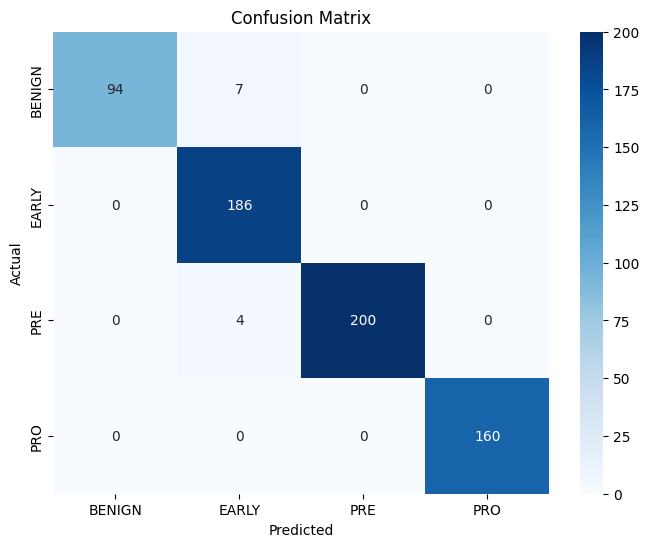

(0.9840464104423495,
 0.9831029185867896,
 0.9831221512144948,
 0.9994674678185821,
 array([[ 94,   7,   0,   0],
        [  0, 186,   0,   0],
        [  0,   4, 200,   0],
        [  0,   0,   0, 160]]))

In [ ]:
classes = ['BENIGN', 'EARLY', 'PRE', 'PRO']  # Class names from the dataset
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
validate_model(model,valid_loader,classes,DEVICE)

Predictions for an individual image with probabilities

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from PIL import Image
import io
import base64


def plot_attention_heatmap(image_path, model, device):
    # Load and preprocess the image
    img = Image.open(image_path).convert("RGB")
    img_tensor = img_transform(img).unsqueeze(0).to(device)

    # Get attention weights from the ViT model
    model.eval()
    with torch.no_grad():
        output = model(img_tensor)

    # Extract the attention maps from ViT model
    # The ViT model has a multi-head attention mechanism. We use the attention map of the last layer.
    attention_maps = model.blocks[-1].attn.get_attention_map(img_tensor)

    # Get the first attention map (assuming the model returns multiple attention maps)
    attention_map = attention_maps[0]  # shape: [1, num_heads, 14, 14] (example for ViT)

    # Convert to heatmap
    attention_map = attention_map.squeeze().cpu().numpy()
    attention_map = np.mean(attention_map, axis=0)  # Average across all heads

    # Resize to original image size
    attention_map_resized = np.resize(attention_map, (224, 224))

    # Plot the original image and the heatmap overlay
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.imshow(attention_map_resized, cmap='jet', alpha=0.5)  # Overlay heatmap with 50% transparency
    plt.colorbar()
    plt.title("Attention Heatmap")
    plt.show()

# Example usage:
image_path = "/content/drive/MyDrive/MLProject/Original/Benign/WBC-Benign-003.jpg"
plot_attention_heatmap(image_path, model, device)


NameError: name 'model' is not defined

In [ ]:
!pip install pillow

In [ ]:
from PIL import Image
import torchvision.transforms as transforms

def preprocess_image(image_path):
    """Loads and preprocesses an image.

    Args:
        image_path (str): Path to the image file.

    Returns:
        torch.Tensor: Preprocessed image tensor.
    """
    # Load the image
    img = Image.open("/content/drive/MyDrive/MLProject/Original/Benign/WBC-Benign-003.jpg").convert('RGB')  # Convert to RGB if necessary

    # Define the transformations (adjust as needed for your model)
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to the model's input size
        transforms.ToTensor(),           # Convert to a PyTorch tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalize with ImageNet stats
                             std=[0.229, 0.224, 0.225])
    ])

    # Apply the transformations
    img_tensor = transform(img)

    return img_tensor

Cross-Validation for Robustness

In [ ]:
import torch
from torch.utils.data import DataLoader, SubsetRandomSampler
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Define your validate_model function
def validate_model(model, val_loader, classes, device):
    model.eval()
    y_true = []
    y_pred = []
    y_probs = []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(torch.argmax(probs, dim=1).cpu().numpy())
            y_probs.extend(probs.cpu().numpy())

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_probs = np.array(y_probs)

    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_true, y_probs, multi_class='ovr', average='weighted')

    return precision, recall, f1, roc_auc, y_probs

# Define the k-fold validation function
def k_fold_validation(model, dataset, k, device, classes):
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    fold_results = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(dataset.data, dataset.targets)):
        print(f"Fold {fold+1}/{k}")
        train_sampler = SubsetRandomSampler(train_idx)
        val_sampler = SubsetRandomSampler(val_idx)
        train_loader = DataLoader(dataset, sampler=train_sampler, batch_size=32)
        val_loader = DataLoader(dataset, sampler=val_sampler, batch_size=32)

        # Reset model weights here for each fold
        model = YourModel()  # Reinitialize the model
        model.to(device)  # Ensure the model is on the correct device

        # Train your model here (your training loop should go here)

        # Validate and compute metrics
        precision, recall, f1, roc_auc, _ = validate_model(model, val_loader, classes, device)
        print(f"Fold {fold+1} - Precision: {precision}, Recall: {recall}, F1: {f1}, ROC-AUC: {roc_auc}")
        fold_results.append((precision, recall, f1, roc_auc))

    # Compute average metrics across folds
    avg_metrics = np.mean(fold_results, axis=0)
    print(f"Average Precision: {avg_metrics[0]:.4f}, Recall: {avg_metrics[1]:.4f}, F1: {avg_metrics[2]:.4f}, ROC-AUC: {avg_metrics[3]:.4f}")

In [ ]:
basePath = '/content/drive/MyDrive/MLProject/model.pt'
basePAth2 = '/content/drive/MyDrive/MLProject/optimizer.pt'

torch.save(model.state_dict(), basePath)
torch.save(optimizer.state_dict(), basePAth2)


### Making API

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
basePath = '/content/drive/MyDrive/MLProject/model.pt'
model_path = "/content/drive/MyDrive/MLProject/model.pt"

In [ ]:
import torch
import torchvision
from torch import nn
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import time
import numpy
import os
from torch.utils.data import DataLoader
import random
import zipfile
from pathlib import Path
import requests
import numpy as np
from PIL import Image

In [ ]:
def getViT(seed,classNames,DEVICE):
  setAllSeeds(seed)
  vitWeights = torchvision.models.ViT_B_16_Weights.DEFAULT
  vitTransforms = vitWeights.transforms()
  vit = torchvision.models.vit_b_16(weights=vitWeights).to(DEVICE)
  for param in vit.parameters():
    param.requires_grad = False
  vit.heads = nn.Linear(in_features=768, out_features=classNames).to(DEVICE)
  return vit,vitTransforms

In [ ]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

cuda:0


In [ ]:
def setAllSeeds(seed):
  os.environ['MY_GLOBAL_SEED'] = str(seed)
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed_all(seed)

In [ ]:
model, transformers = getViT(42,4, DEVICE)

In [ ]:
#  loading the model
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))

<ipython-input-43-6ab46de6ea55>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))


<All keys matched successfully>

In [ ]:
# defining the image transformation

def img_transform(input_img):
  mean = [0.5, 0.5, 0.5]
  std = [0.5, 0.5, 0.5]

  img_transforms = transforms.Compose([
                                        transforms.Resize((224,224)),
                                        # transforms.RandomHorizontalFlip(),
                                        transforms.RandomRotation(10),
                                        transforms.Resize((224,224)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))])
  img_bytes = input_img.file.read()
  img = Image.open(io.BytesIO(img_bytes))
  # encoded image
  encoded_string = base64.b64encode(img_bytes)
  bs64 = encoded_string.decode('utf-8')
  encoded_img = f'data:image/jpeg;base64,{bs64}'
  tensor_img = img_transforms(img).unsqueeze(0)
  return encoded_img, tensor_img

In [ ]:
def preprocess_image(image_path):
    # Load the image
    image = Image.open(image_path).convert("RGB")
    # Apply the transformations
    transformed_image = img_transform(image)
    # Add a batch dimension
    transformed_image = transformed_image.unsqueeze(0)  # Shape: [1, 3, 224, 224]
    return transformed_image

### Testing with a sample image:
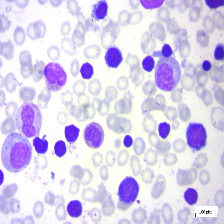

In [ ]:

samp_img_path= "/content/drive/MyDrive/MLProject/Original/Benign/WBC-Benign-003.jpg"
t_img = preprocess_image(samp_img_path)
print(t_img.shape)

In [ ]:
# set model to evaluation mode
preds = model(t_img)
print(preds)

tensor([[ 33.3619,   0.2205, -22.8135, -10.8008]], grad_fn=<AddmmBackward0>)


In [ ]:
predicted_class = torch.argmax(preds)
print(f"The predicted class is {predicted_class}")

The predicted class is 0


In [ ]:
# image classes
classes = ['BENIGN', 'EARLY', 'PRE', 'PRO']
class_name = classes[predicted_class]
print(f"The predicted class is {class_name}")

The predicted class is BENIGN


In [ ]:
# function to predict input image
def predict(input_img):
    model.eval()
    with torch.no_grad():
        input_img = preprocess_image(input_img)
        preds = model(input_img)
        predicted_class = torch.argmax(preds)
        class_name = classes[predicted_class]
        return class_name

# test here
samp_img_path= "/content/drive/MyDrive/MLProject/Original/Benign/WBC-Benign-003.jpg"
cancer_status = predict(samp_img_path)
print(f"The predicted class is {cancer_status}")

The predicted class is BENIGN


In [ ]:
# function to predict input image
def get_prediction(input_img, is_api = False):
  inp_img, encoded_img = img_transform(input_img)
  model.eval()
  with torch.no_grad():
      preds = model(input_img)
      predicted_class = torch.argmax(preds)
      class_name = classes[predicted_class]

  pred_results = {
            "class_name": class_name,
        }

  # conditionally add image data to the result dictionary
  if not is_api:
      pred_results["encoded_img"] = encoded_img

  return pred_results



In [ ]:
ef getViT(seed,classNames,DEVICE):
  setAllSeeds(seed)
  vitWeights = torchvision.models.ViT_B_16_Weights.DEFAULT
  vitTransforms = vitWeights.transforms()
  vit = torchvision.models.vit_b_16(weights=vitWeights).to(DEVICE)
  for param in vit.parameters():
    param.requires_grad = False
  vit.heads = nn.Linear(in_features=768, out_features=classNames).to(DEVICE)
  return vit,vitTransforms




©Developed by,
* Lakshmipathi Rao Kocherlakota 21BCE8552
* Mahatir Ahmed Tusher 21BCE8971
* Sree Nikhil Velicheti 21BCE7775
* Saket Choudary Kongara  21BCE7918
